In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('datasets/internacoes-sus.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Especialidade  190 non-null    object
 1   Contratado     190 non-null    int64 
 2   Federal        190 non-null    int64 
 3   Estadual       190 non-null    int64 
 4   Municipal      190 non-null    int64 
 5   Filantrópica   190 non-null    int64 
 6   Universitário  190 non-null    int64 
 7   Próprio        190 non-null    int64 
 8   Ignorado       190 non-null    int64 
 9   Ano            190 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 15.0+ KB


In [4]:
df.head()

,Especialidade,Contratado,Federal,Estadual,Municipal,Filantrópica,Universitário,Próprio,Ignorado,Ano
0,Cirurgia,721,22687,14603,34203,8489,28569,0,0,2000
1,Obstetrícia,11279,7090,12699,39208,7702,3311,0,0,2000
2,Clínica médica,2058,8027,20657,20947,5864,18791,0,0,2000
3,Crônicos,2783,0,0,0,584,1796,0,0,2000
4,Psiquiatria,8356,2073,2202,4831,1649,1485,0,0,2000


In [5]:
df['Especialidade'].unique()

array(['Cirurgia', 'Obstetrícia', 'Clínica médica', 'Crônicos',
       'Psiquiatria', 'Tisiologia', 'Pediatria', 'Reabilitação',
       'Pneumologia', 'AIDS', 'Psicologia', 'Pós-transplante'],
      dtype=object)

In [6]:
# Faço o somatório de todas as internações por ano
total_geral = df.iloc[:, 1:].groupby('Ano').agg('sum').sum(axis=1)

In [7]:
total_geral

Ano
2000    326005
2001    294299
2002    261654
2003    265066
2004    269859
2005    254824
2006    239579
2007    255689
2008    208805
2009    228607
2010    231508
2011    220054
2012    233557
2013    230089
2014    212002
2015    225160
2016    293048
2017    302468
dtype: int64

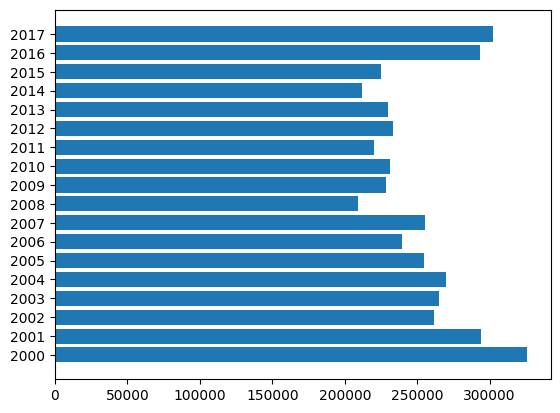

In [8]:
fig, ax = plt.subplots()

ax.barh([str(x) for x in total_geral.keys()], total_geral.values)
# ax.set_title('Número de internações no ano')
plt.show()

In [9]:
# Faço o somatório de internações por especialidade
total_geral_especialidade = df.groupby('Especialidade').agg('sum').sum(axis=1)

In [10]:
total_geral_especialidade

Especialidade
AIDS                 22757
Cirurgia           1650391
Clínica médica     1210411
Crônicos            104736
Obstetrícia        1096796
Pediatria           468066
Pneumologia          27607
Psicologia           32413
Psiquiatria         235399
Pós-transplante      16255
Reabilitação         39043
Tisiologia           30134
dtype: int64

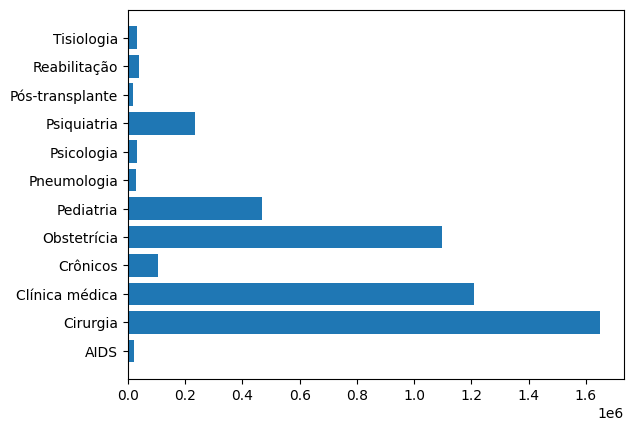

In [11]:
fig, ax = plt.subplots()

ax.barh([str(x) for x in total_geral_especialidade.keys()], total_geral_especialidade.values)
# ax.set_title('Número de internações por especialidade - (2000 - 2017)')
plt.show()

In [12]:
total_geral_especialidade['Outros'] = total_geral_especialidade.loc[total_geral_especialidade < 200000].sum()

In [13]:
total_geral_especialidade.drop(total_geral_especialidade.loc[total_geral_especialidade < 200000].index, inplace=True)

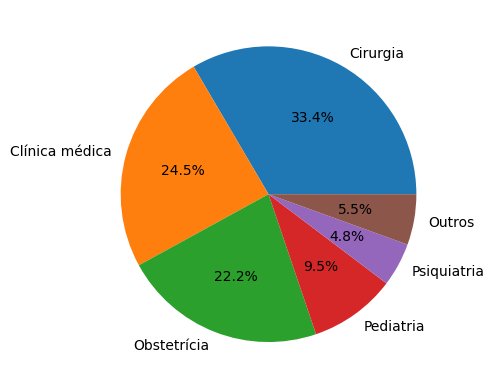

In [14]:
fig, ax = plt.subplots()
ax.pie(total_geral_especialidade.values, labels=total_geral_especialidade.keys(), autopct='%1.1f%%')
# ax.set_title('Internações por especialidade - (2000 - 2017)')
plt.show()

In [15]:
pediatria = df.loc[(df['Especialidade'] == 'Pediatria')].groupby(['Especialidade', 'Ano']).agg('sum').sum(axis=1)
obstetricia = df.loc[(df['Especialidade'] == 'Obstetrícia')].groupby(['Especialidade', 'Ano']).agg('sum').sum(axis=1)
cirurgia = df.loc[(df['Especialidade'] == 'Cirurgia')].groupby(['Especialidade', 'Ano']).agg('sum').sum(axis=1)
clinica = df.loc[(df['Especialidade'] == 'Clínica médica')].groupby(['Especialidade', 'Ano']).agg('sum').sum(axis=1)

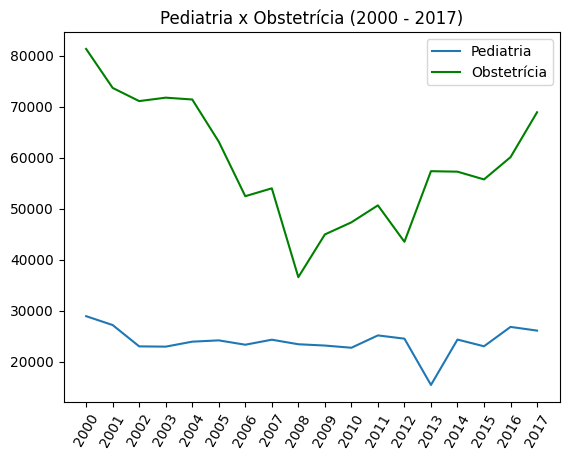

In [16]:
fig, ax = plt.subplots()
ax.plot([str(x[1]) for x in pediatria.keys()], pediatria.values, label='Pediatria')
ax.plot([str(x[1]) for x in obstetricia.keys()], obstetricia.values, color='green', label= 'Obstetrícia')
ax.set_title('Pediatria x Obstetrícia (2000 - 2017)')
ax.tick_params(axis='x', labelrotation=60)
plt.legend()
plt.show()

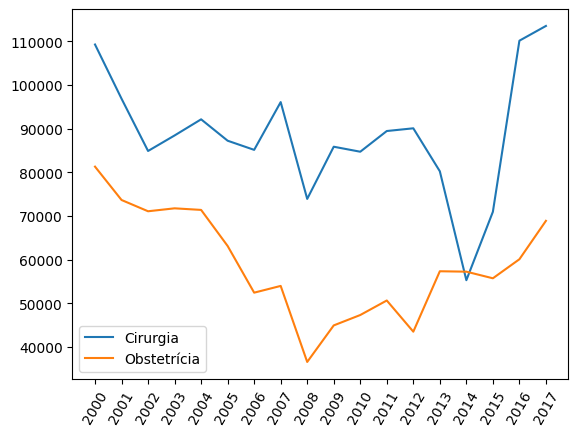

In [17]:
fig, ax = plt.subplots()
ax.plot([str(x[1]) for x in cirurgia.keys()], cirurgia.values, label='Cirurgia')
ax.plot([str(x[1]) for x in obstetricia.keys()], obstetricia.values, label= 'Obstetrícia')
# ax.set_title('Cirurgia x Obstetrícia (2000 - 2017)')
ax.tick_params(axis='x', labelrotation=60)
plt.legend()
plt.show()

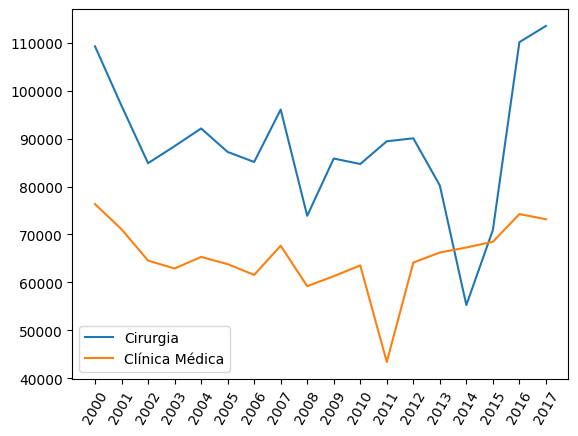

In [18]:
fig, ax = plt.subplots()
ax.plot([str(x[1]) for x in cirurgia.keys()], cirurgia.values, label='Cirurgia')
ax.plot([str(x[1]) for x in clinica.keys()], clinica.values, label= 'Clínica Médica')
# ax.set_title('Cirurgia x Clínica Médica (2000 - 2017)')
ax.tick_params(axis='x', labelrotation=60)
plt.legend()
plt.show()